<br>

## Instructions to follow:

- Please include all your codes here. Be sure that your code is CLEAN, READABLE, and REPRODUCIBLE.
- Put your data set into a **datasets** folder.
- Put your images (if available) into an **img** folder.
- Please write YOUR OWN code. **DO NOT copy** my codes or someone else's codes.

## Data: Estimation of obesity levels based on eating habits and physical condition

* This [obesity dataset](https://archive-beta.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition) 
include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

* This dataset is originally available at UC Irvine Machine Learning Repository via the [Link](https://archive-beta.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition). The related paper is also available 
in [here](https://www.sciencedirect.com/science/article/pii/S2352340919306985).

* The variables in the dataset are: 

   * `Gender`: A binary variable with levels **Female** and **Male**.
   * `Age`: A numerical variable in years.
   * `Height`: A numerical variable in meters.
   * `Weight`: A numerical variable in kilograms.
   * `family_history_with_overweight`: A binary variable with levels **Yes** and **No** showing whether a family member suffered/suffers from overweight.
   * `FAVC` : A binary variable with levels **Yes** and **No** showing frequency of consumption of high caloric food.
   * `FCVC` : A numerical variable here. Frequency of consumption of vegetables (**Interestingly, it is a categorical variable in the paper**).
   * `NCP` : A numerical variable here. Number of main meals (**Interestingly, it is a categorical variable in the paper**).
   * `CAEC` : An ordinal variable with four levels **No**, **Sometimes**, **Frequently**, and **Always** showing consumption of food between meals.    
   * `SMOKE` : A binary variable with levels **Yes** and **No** showing smoking habit.
   * `CH2O` : A numerical variable here. Consumption of water daily (**Interestingly, it is a categorical variable in the paper**).
   * `SCC` : A binary variable with levels **Yes** and **No** showing calories consumption monitoring.
   * `FAF` : A numerical variable here. Physical activity frequency (**Interestingly, it is a categorical variable in the paper**).
   * `TUE` : A numerical variable here. Time using technology devices (**Interestingly, it is  a categorical variable in the paper**). 
   * `CALC` : An ordinal variable with four levels **No**, **Sometimes**, **Frequently**, and **Always** showing consumption of alcohol
   frequency.
   * `MTRANS` : A nominal variable with four levels **Public_Transportation**, **Automobile**, **Walking**, **Motorbike**, 
   and **Bike** showing transportation type used.
   * `NObeyesdad`:  Another nominal variable (**not clear**). 
   
* A portion of the data set is shown below:   

In [31]:
# import the data set
import pandas as pd

df = pd.read_csv('datasets/ObesityDataSet_raw_and_data_sinthetic.csv')

In [32]:
# check the first five lines
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

**Step 1:** In order to change this problem into a regression problem, following [Center for Disease Control and Prevention(CDC)](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html#:~:text=With%20the%20metric%20system%2C%20the,to%20obtain%20height%20in%20meters.), create the BMI variable as your **response variable** as follows:


$$
BMI = weight (kg) / [height (m)]^2,
$$

and include the **numerical features** `Age`, `FCVC`,	`NCP`,`CH2O`, `FAF`, and `TUE` in your dataset only. Show the first 5 lines of your dataset.

In [34]:
# create the BMI variable
df['BMI'] = df['Weight']/df['Height']**2

In [35]:
# include the numerical features
df = df[['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']]

In [36]:
# show the first 5 lines
df.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,BMI
0,21.0,2.0,3.0,2.0,0.0,1.0,24.386526
1,21.0,3.0,3.0,3.0,3.0,0.0,24.238227
2,23.0,2.0,3.0,2.0,2.0,1.0,23.765432
3,27.0,3.0,3.0,2.0,2.0,0.0,26.851852
4,22.0,2.0,1.0,2.0,0.0,0.0,28.342381


**Step 2:**  Decision Tree Regressor Implementation

- Implement a decision tree regressor to your data set.
- This part may involve tuning of hyper parameters of decision tree regressor with respect to **mean squared error** metric.
- Visualize the best performing decision tree here.
- Comment on the feature importance here. 

In [37]:
# import the necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# split the data set into train and test sets
X = df.drop('BMI', axis=1)
y = df['BMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# implement the decision tree regressor
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

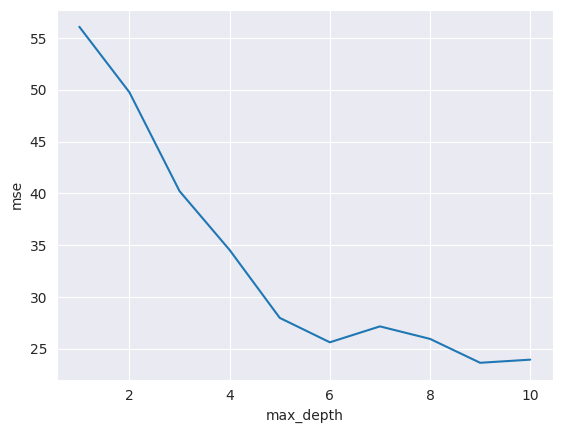

In [40]:
# hyper parameter tuning

# create a list of max_depth values
max_depth_list = list(range(1, 11))

# create a list of mse values
mse_list = []

# create a for loop

for depth in max_depth_list:
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg.fit(X_train, y_train)
    y_pred = tree_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    
# plot the mse values against max_depth values
plt.plot(max_depth_list, mse_list)
plt.xlabel('max_depth')
plt.ylabel('mse')
plt.show()

**Step 3:** Random Forest Tree Regressor Implementation

- Implement a random forest tree regressor to your data set.
- This part may involve tuning of hyper parameters of random forest regressor.
- Visualize one of the trees in the best performing random forest regressor.
- Comment on the feature importance here.

In [41]:
# import the necessary libraries
from sklearn.ensemble import RandomForestRegressor

In [42]:
# implement the random forest tree regressor
forest_reg = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

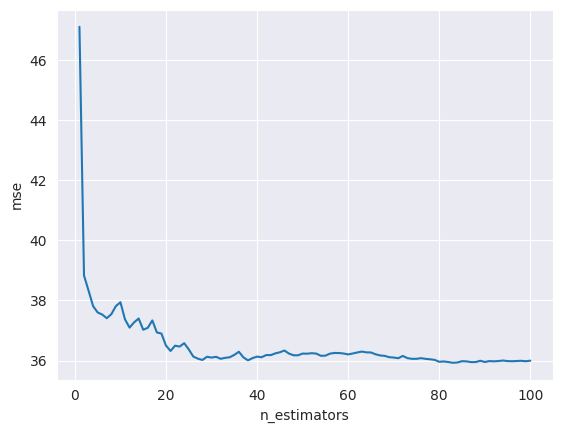

In [43]:
# hyper parameter tuning

# create a list of n_estimators values
n_estimators_list = list(range(1, 101))

# create a list of mse values
mse_list = []

# create a for loop

for n in n_estimators_list:
    forest_reg = RandomForestRegressor(n_estimators=n, max_depth=3, random_state=42)
    forest_reg.fit(X_train, y_train)
    y_pred = forest_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    
# plot the mse values against n_estimators values
plt.plot(n_estimators_list, mse_list)
plt.xlabel('n_estimators')
plt.ylabel('mse')
plt.show()

**Step 4:** 

- Pick the best performing model.
- Provide detailed explanation on why you picked this model as the final model here and talk about the feature importance.

In [44]:
# pick the best performing model
forest_reg = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

35.9952982048779


In [45]:
# feature importance
forest_reg.feature_importances_

array([0.45788703, 0.19605681, 0.06674209, 0.04275373, 0.05385544,
       0.18270491])

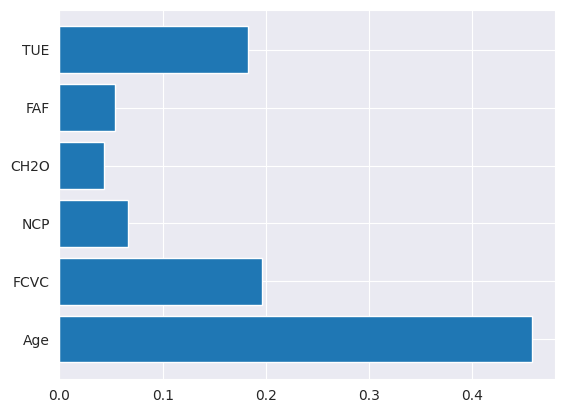

In [46]:
# visualize the feature importance
plt.barh(X.columns, forest_reg.feature_importances_)
plt.show()

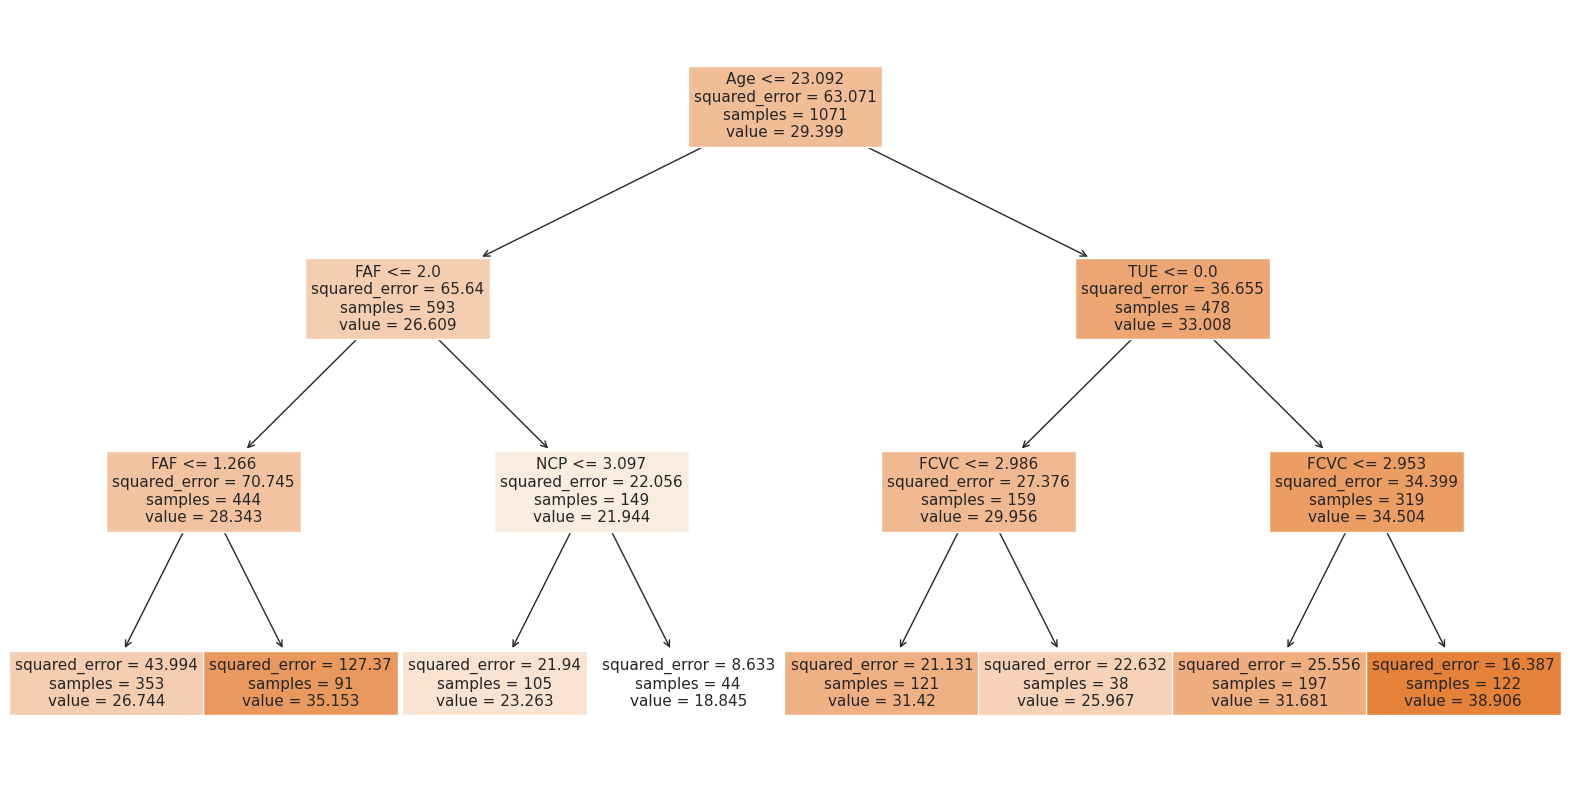

In [47]:
# visualize one of the trees in the best performing random forest regressor
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(forest_reg.estimators_[0], feature_names=X.columns, filled=True)
plt.show()